In [1]:
# Heatmaps: Condom use, female led households, urban population, rural population
# Possible correlations:
# Condom use -> population growth
# Research and development expenditure -> mortality
# Age dependency ratio -> GDP
# Age dependency ratio -> condom use

In [2]:
%%capture
!pip install geopandas

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')

dfu = pd.read_csv('/content/gdrive/MyDrive/InfoVis/IndicatorsV3_Unnormalized.csv')

european_countries = ['Austria', 'Italy', 'Belgium', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia', 'Luxembourg', 'Cyprus', 'Malta',
                      'Czech Republic', 'Netherlands', 'Denmark', 'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania', 'France', 
                      'Slovak Republic', 'Germany', 'Slovenia', 'Greece', 'Spain', 'Hungary', 'Sweden', 'Ireland', 'Norway', 'Switzerland', 
                      'United Kingdom', 'Serbia', 'Belarus', 'Moldova', 'Albania', 'Montenegro', 'Bosnia and Herzegovina', 'Kosovo', 'Montenegro', 
                      'Macedonia, FYR', 'Ukraine', 'Iceland']

eu_countries = ['Austria', 'Italy', 'Belgium', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia', 'Luxembourg', 'Cyprus', 'Malta',
                'Czech Republic', 'Netherlands', 'Denmark', 'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania', 'France', 
                'Slovak Republic', 'Germany', 'Slovenia', 'Greece', 'Spain', 'Hungary', 'Sweden', 'Ireland', 'Norway', 'Switzerland', 
                'United Kingdom']

Mounted at /content/gdrive


# Geographical Heatmaps

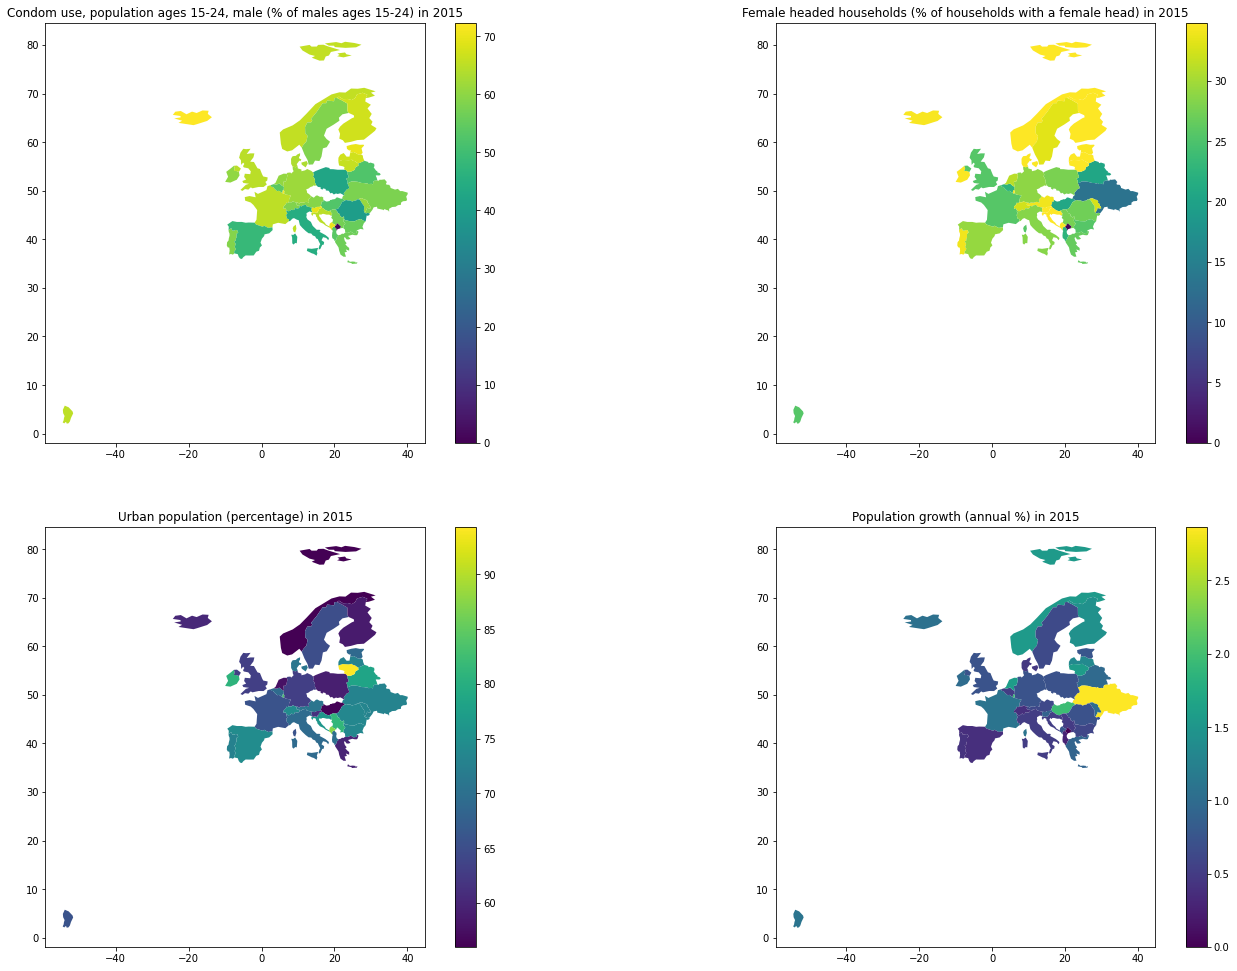

In [4]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.continent == 'Europe']

world.columns = ['pop_est', 'continent', 'Country', 'CODE', 'gdp_md_est', 'geometry']

dfu = dfu.rename(columns={'CountryName': 'Country'})

dfu['Urban population (percentage)'] = dfu['Urban population'] / dfu['Population, total'] * 100.0

cols = ['Condom use, population ages 15-24, male (% of males ages 15-24)', 
        'Female headed households (% of households with a female head)',
        'Urban population (percentage)',
        'Population growth (annual %)']
col_idx_map = {1: 'Condom use, population ages 15-24, male (% of males ages 15-24)', 
               2: 'Female headed households (% of households with a female head)',
               3: 'Urban population (percentage)',
               4: 'Population growth (annual %)'}
name_idx_map = {1: 'Condom use, population ages 15-24, male (% of males ages 15-24)', 
               2: 'Female headed households (% of households with a female head)',
               3: 'Urban population (percentage)',
               4: 'Population growth (annual %)'}
df_list = []

for col in cols:
    df = dfu
    df1 = df[df['Country'].isin(european_countries) * df['Year'] == 2015][['Country', col]]

    merge = pd.merge(world, df1, on='Country')
    df_list.append(merge)

fig, axes = plt.subplots(2, 2)
fig.set_figwidth(24)
fig.set_figheight(17)

count=0
for r in range(2):
    for c in range(2):
        ax = df_list[count].plot(column=col_idx_map[count+1], ax=axes[r, c], legend=True)
        ax.title.set_text(name_idx_map[count+1] + ' in 2015')
        count += 1
        

plt.show()

# Possible correlations

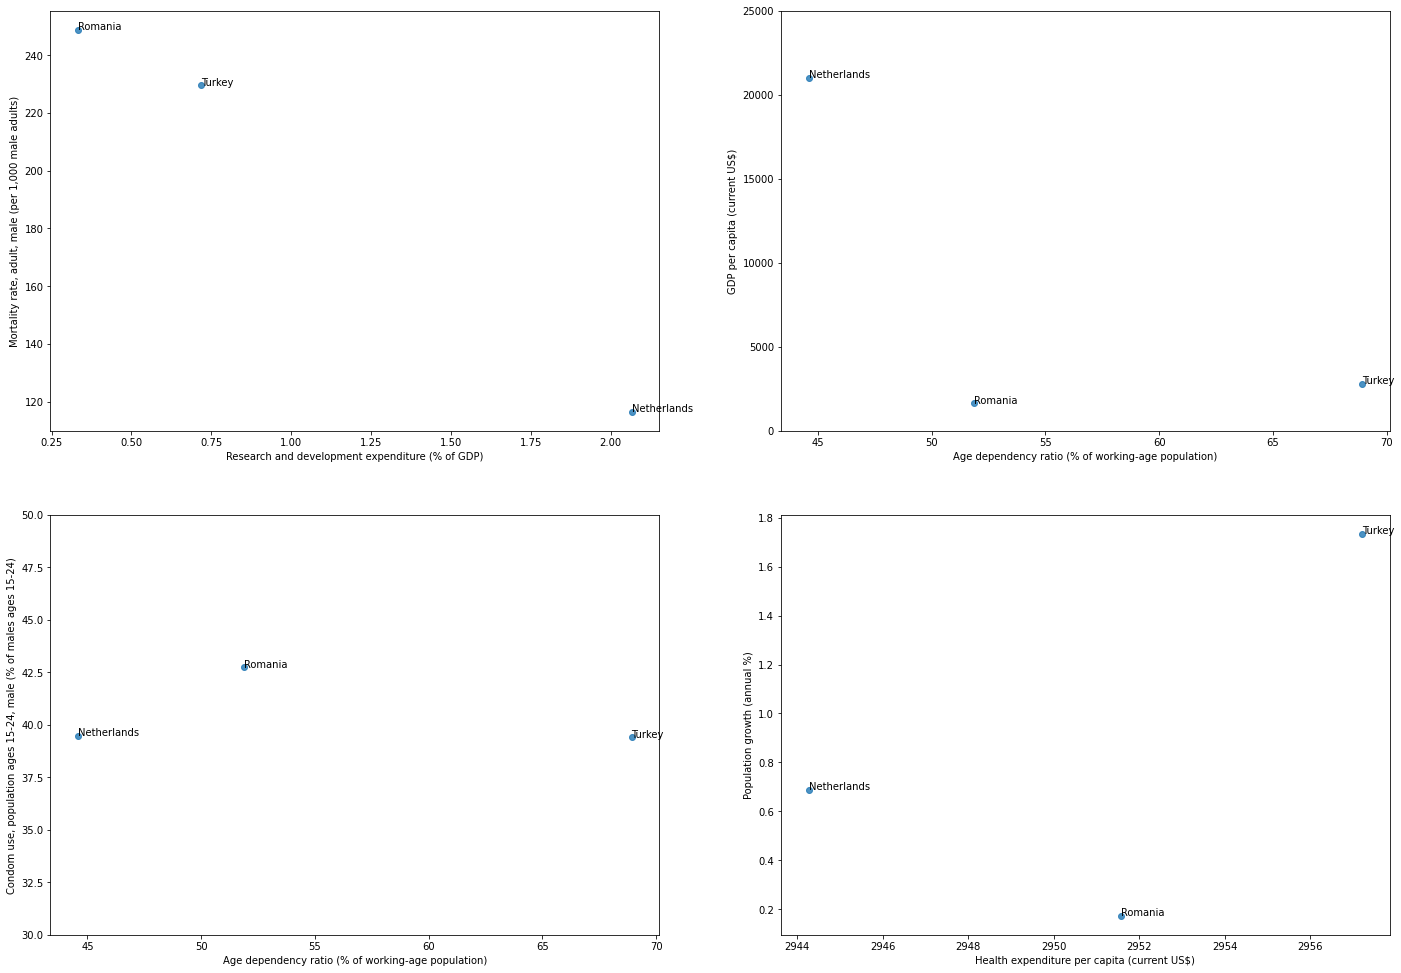

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

countries_to_compare = ['Romania', 'Netherlands', 'Turkey']

df_new = dfu[dfu['Country'].isin(countries_to_compare) * dfu['Year'] == 1990]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figwidth(24)
fig.set_figheight(17)


# plt.ylim(500, 50000)
sns.regplot(data = df_new, x = df_new["Research and development expenditure (% of GDP)"], y = df_new["Mortality rate, adult, male (per 1,000 male adults)"], fit_reg= False, ax = ax1)
for i in range(df_new.shape[0]):
  ax1.text(x = df_new["Research and development expenditure (% of GDP)"].iloc[i], y = df_new["Mortality rate, adult, male (per 1,000 male adults)"].iloc[i], s = df_new["Country"].iloc[i])

ax2.set_ylim(0, 25000)
sns.regplot(data = df_new, x = df_new["Age dependency ratio (% of working-age population)"], y = df_new["GDP per capita (current US$)"], fit_reg= False, ax = ax2)
for i in range(df_new.shape[0]):
  ax2.text(x = df_new["Age dependency ratio (% of working-age population)"].iloc[i], y = df_new["GDP per capita (current US$)"].iloc[i], s = df_new["Country"].iloc[i])

ax3.set_ylim(30, 50)
sns.regplot(data = df_new, x = df_new["Age dependency ratio (% of working-age population)"], y = df_new["Condom use, population ages 15-24, male (% of males ages 15-24)"], fit_reg= False, ax = ax3)
for i in range(df_new.shape[0]):
  ax3.text(x = df_new["Age dependency ratio (% of working-age population)"].iloc[i], y = df_new["Condom use, population ages 15-24, male (% of males ages 15-24)"].iloc[i], s = df_new["Country"].iloc[i])


sns.regplot(data = df_new, x = df_new["Health expenditure per capita (current US$)"], y = df_new["Population growth (annual %)"], fit_reg= False, ax = ax4)
for i in range(df_new.shape[0]):
  ax4.text(x = df_new["Health expenditure per capita (current US$)"].iloc[i], y = df_new["Population growth (annual %)"].iloc[i], s = df_new["Country"].iloc[i])